In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import sys

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = (2,2)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['svg.fonttype'] = 'none'

sys.path.append("/mnt/c/Users/ochapman/Documents/Mesirov/scRNA+ATAC/src")
from SingleCellExperiment import *

In [3]:
ht = rcmb56ht().get_qc_pass_cells()
pdx = rcmb56pdx().get_qc_pass_cells()
ht["sample"]="rcmb56-ht"
pdx["sample"]="rcmb56-pdx"

n = 2531 231 431 9189
Ttest_indResult(statistic=0.1374467246909407, pvalue=0.8907890718058749)
MannwhitneyuResult(statistic=1023717.0, pvalue=0.35686352489050843)
LeveneResult(statistic=16.621338863255843, pvalue=4.600991870179236e-05)
ht mean: 2.347843731363287 variance: 0.3351095660050812
pdx mean: 2.3424956603585523 variance: 0.5237225641703093


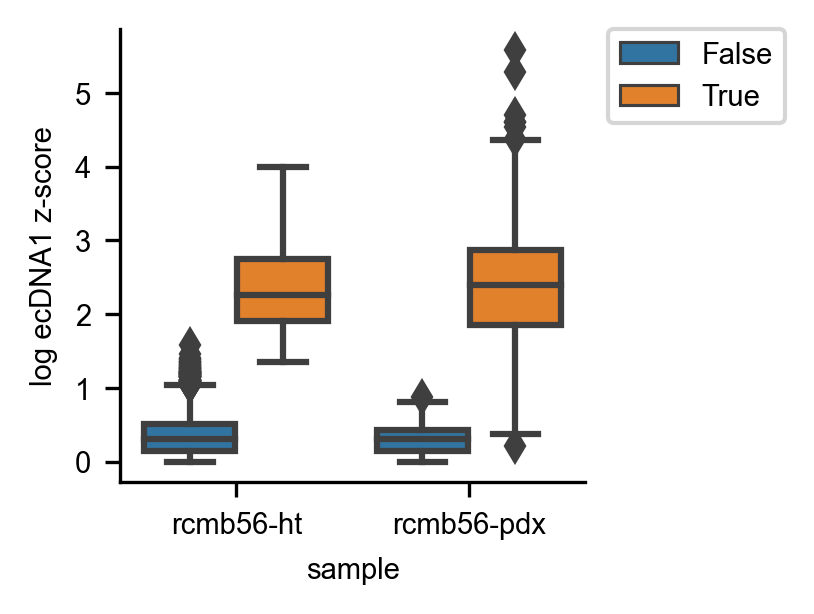

In [20]:
def compare_zscores(ecdna):
    df = pd.concat([ht,pdx])[["sample",ecdna+"_status",ecdna+"_z-score"]].copy()
    df["log "+ecdna+" z-score"] = np.log(df[ecdna+"_z-score"]+1)
    plot = sns.boxplot(data=df,x="sample",y="log "+ecdna+" z-score",hue=ecdna+"_status")
    sns.despine()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    ht_pos = df[(df[ecdna+"_status"]) & (df["sample"] == "rcmb56-ht")]
    ht_neg = df[(df[ecdna+"_status"]==False) & (df["sample"] == "rcmb56-ht")]
    pdx_pos = df[(df[ecdna+"_status"]) & (df["sample"] == "rcmb56-pdx")]
    pdx_neg = df[(df[ecdna+"_status"]==False) & (df["sample"] == "rcmb56-pdx")]
    print("n = {} {} {} {}".format(len(ht_neg),len(ht_pos),len(pdx_neg),len(pdx_pos)))
    x = ht_pos["log "+ecdna+" z-score"]
    y = pdx_pos["log "+ecdna+" z-score"]
    print(scipy.stats.ttest_ind(a=x,b=y,equal_var=False))
    print(scipy.stats.mannwhitneyu(x=x,y=y))
    print(scipy.stats.levene(x,y,center='median'))
    print("ht mean:",np.mean(x),"variance:",np.var(x))
    print("pdx mean:",np.mean(y),"variance:",np.var(y))
    return plot
compare_zscores("ecDNA1")
plt.savefig('ecdna1_zscore_boxplots.svg')

n = 2655 107 647 8973
Ttest_indResult(statistic=5.254150680864518, pvalue=7.193553263744851e-07)
MannwhitneyuResult(statistic=566600.0, pvalue=0.0013241107382049382)
LeveneResult(statistic=24.232275466933103, pvalue=8.689279591315416e-07)
ht mean: 2.366931512502622 variance: 0.2570020023917302
pdx mean: 2.104783386165614 variance: 0.5815397038895795


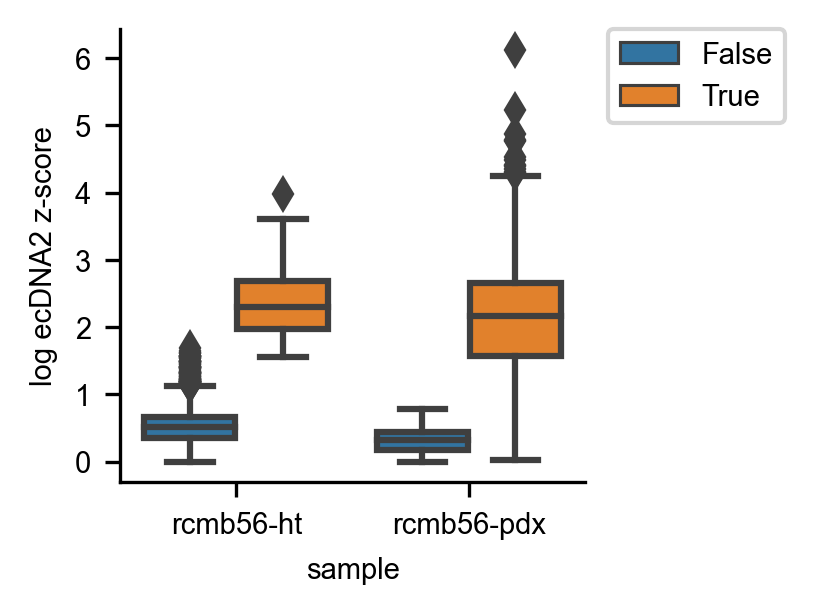

In [21]:
compare_zscores("ecDNA2")
plt.savefig('ecdna2_zscore_boxplots.svg')

n = 2762 0 9620 0
Ttest_indResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=0.0, pvalue=0.0)


/home/ochapman/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


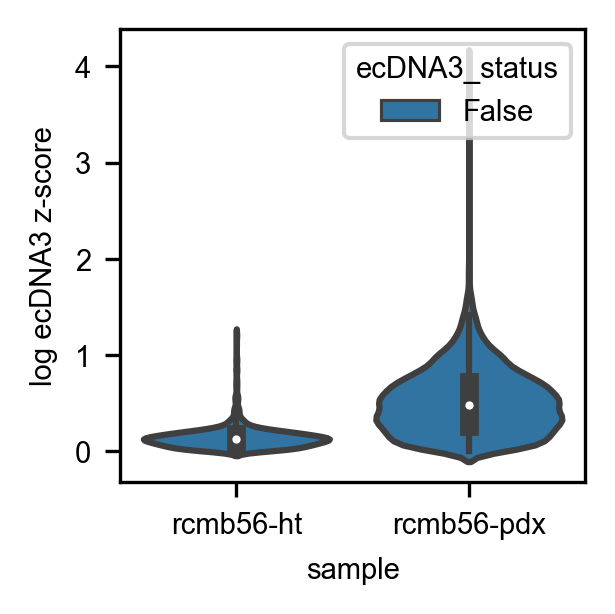

In [73]:
compare_zscores("ecDNA3")